In [ ]:
import os
from google.colab import drive #connexion à votre driver
drive.mount('/content/drive')

In [ ]:
%ls /content/drive/MyDrive/data_uvs/

archive.zip  Data_SoucheO7O3.xls


## Importation des **librairies**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import seaborn  as sns
import matplotlib.pyplot as plt


# Chargement de notre base de données

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/data_uvs/Data_SoucheO7O3.xls")
df.head()

,Sexe,Age,ratio,ID,Type_Hb,G6PD,Gpe_ABO,Rhesus,EP_6M_AVT,AcPf_6M_AVT,EP_1AN_AVT,AcPf_1AN_AVT,EP_6M_APR,AcPf_6M_APR,EP_1AN_APR,AcPf_1AN_APR
0,Mas,29.2,6.74,35/01,AA,12.0,O,+,1,0,1,0,5,0,6,1
1,Mas,28.0,4.56,35/02,AA,8.8,O,+,0,0,0,0,4,0,8,1
2,Mas,8.3,6.94,35/03,AA,1.0,B,+,0,0,0,0,6,0,8,5
3,Mas,28.7,1.87,35/06,AA,10.1,A,+,0,0,0,0,0,0,2,1
4,Mas,19.8,5.52,16/40,AA,7.4,A,+,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(1235, 16)

## Vérification des valeurs manquantes

In [ ]:
df.isnull().sum()/df.shape[0]

Sexe            0.000000
Age             0.000000
ratio           0.000000
ID              0.000000
Type_Hb         0.022672
G6PD            0.000000
Gpe_ABO         0.022672
Rhesus          0.022672
EP_6M_AVT       0.000000
AcPf_6M_AVT     0.000000
EP_1AN_AVT      0.000000
AcPf_1AN_AVT    0.000000
EP_6M_APR       0.000000
AcPf_6M_APR     0.000000
EP_1AN_APR      0.000000
AcPf_1AN_APR    0.000000
dtype: float64

In [ ]:
df.dropna(axis=0,inplace=True)
df.shape

(1203, 16)

Vu que le nombre de valeur null est trés faible qui sont enrégistré sur 32 ligne sur 1235, on décide de supprimer les ligne contenant ces valeur pour avoir une base propre

In [ ]:
df.isnull().sum()/df.shape[0]

Sexe            0.0
Age             0.0
ratio           0.0
ID              0.0
Type_Hb         0.0
G6PD            0.0
Gpe_ABO         0.0
Rhesus          0.0
EP_6M_AVT       0.0
AcPf_6M_AVT     0.0
EP_1AN_AVT      0.0
AcPf_1AN_AVT    0.0
EP_6M_APR       0.0
AcPf_6M_APR     0.0
EP_1AN_APR      0.0
AcPf_1AN_APR    0.0
dtype: float64

In [ ]:
## création d'une colonne status basé sur le ratio qui prend 1 si le ratio >= 2 sinon 0
## cette classe represente notre variable cible
df["status"] = [0 if status < 2 else 1 for status in df["ratio"]]


# Etude descriptive

In [ ]:
df.describe()

,Age,ratio,G6PD,EP_6M_AVT,AcPf_6M_AVT,EP_1AN_AVT,AcPf_1AN_AVT,EP_6M_APR,AcPf_6M_APR,EP_1AN_APR,AcPf_1AN_APR,status
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.0,1203.000000,1203.000000,1203.000000
mean,27.329094,4.126193,9.951363,1.289277,0.291771,2.673317,0.625935,1.095594,0.0,1.915212,0.386534,0.798836
std,18.571000,2.471020,11.295066,1.805734,0.899523,3.401650,1.751555,1.709328,0.0,2.920658,1.347106,0.401037
min,3.400000,0.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,12.050000,2.255000,6.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
50%,21.000000,3.550000,8.600000,1.000000,0.000000,2.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,40.850000,5.370000,11.050000,2.000000,0.000000,4.000000,0.000000,1.000000,0.0,2.500000,0.000000,1.000000
max,90.900000,14.000000,170.800000,13.000000,8.000000,25.000000,17.000000,13.000000,0.0,21.000000,14.000000,1.000000


In [ ]:
df['G6PD'].quantile(0.99)

34.4

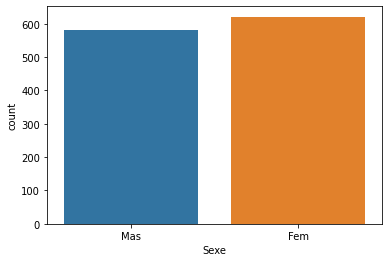

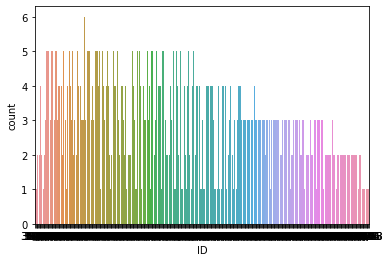

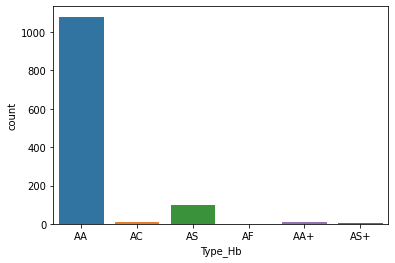

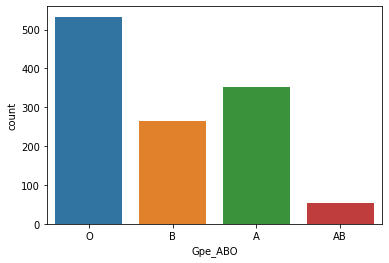

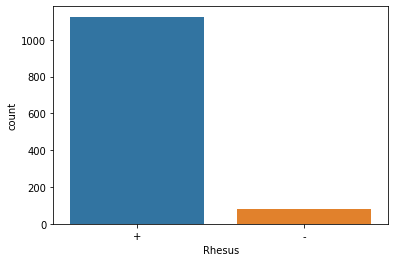

In [ ]:
for col in df.select_dtypes('object'):
  plt.figure()
  sns.countplot(x=col,data=df);

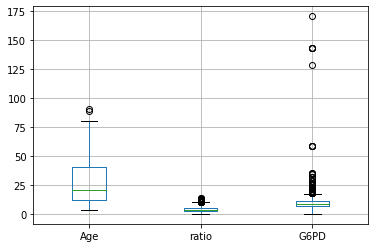

In [ ]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame
df.select_dtypes('float').boxplot()
plt.show()

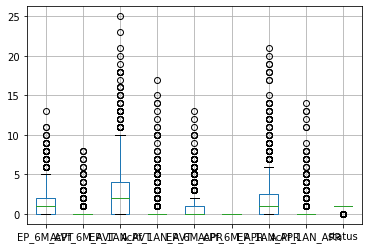

In [ ]:
# Assume 'df' is your DataFrame
df.select_dtypes('int64').boxplot()
plt.show()

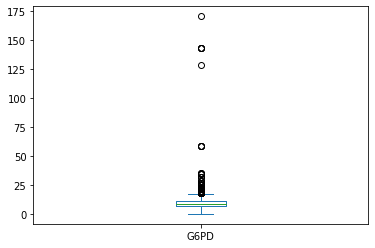

In [ ]:
df["G6PD"].plot.box()

## Analyse en deux dimensions

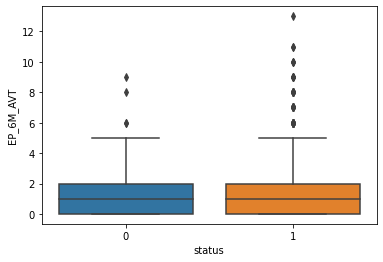

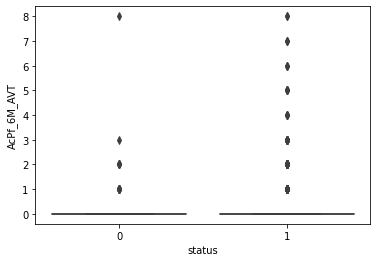

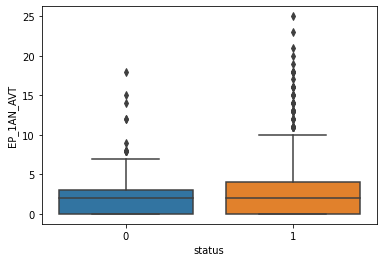

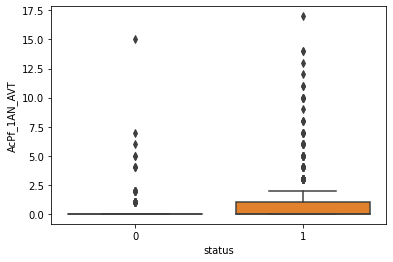

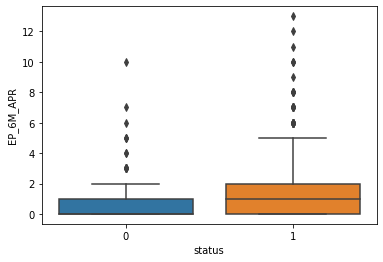

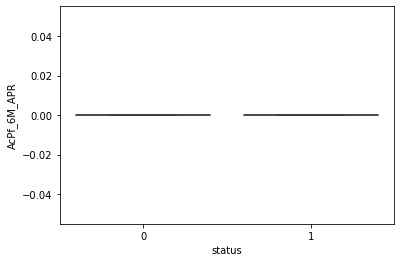

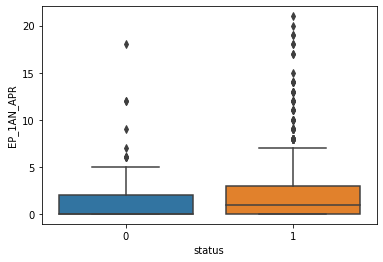

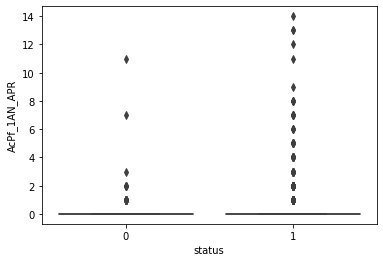

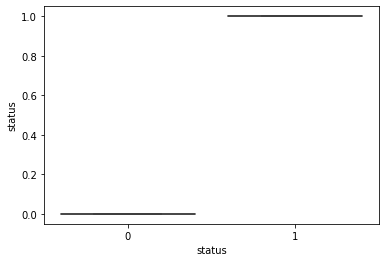

In [ ]:
for col in df.select_dtypes('int64'):
  plt.figure()
  sns.boxplot(x="status",y=col,data=df);

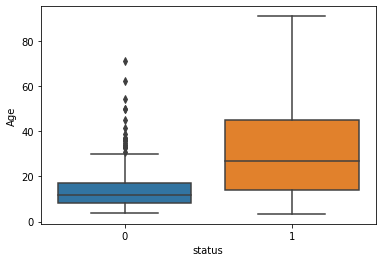

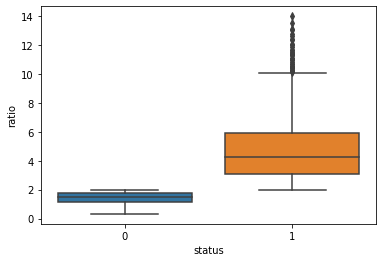

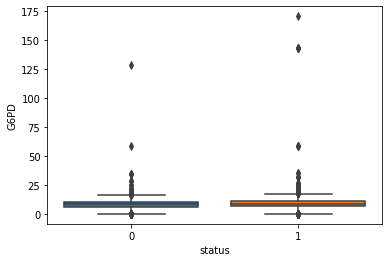

In [ ]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.boxplot(x="status",y=col,data=df);

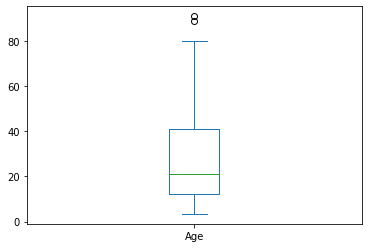

In [ ]:
df["Age"].plot.box()

<Figure size 432x288 with 0 Axes>

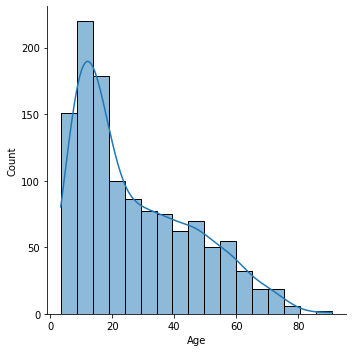

<Figure size 432x288 with 0 Axes>

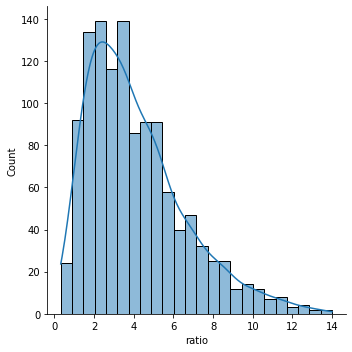

<Figure size 432x288 with 0 Axes>

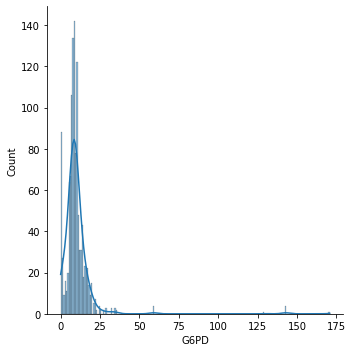

In [ ]:

for col in df.select_dtypes('float'):
  plt.figure()
  sns.displot(df[col],kde=True)



*   l'age moyenne de la population se tourne autour de 20 ans
*   Notre ratio est au tour 2.5 à 3 ce qui prouve que la plus des patient répond positivement au vaccin
*   le G6PD a une moyennne de 15 environ





### Analyse de valeur abérantes

In [ ]:
# valeur < Q1 - 1,5*IQR ou valeur > Q3 + 1,5*IQR

def finding_outliers(data, variable_name):
  iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
  lower = data[variable_name].quantile(0.25) - 1.5 * iqr
  upper = data[variable_name].quantile(0.75) + 1.5 * iqr 
  return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

In [ ]:
finding_outliers(df, 'G6PD').sort_values('G6PD').shape

(79, 17)

In [ ]:
finding_outliers(df, 'EP_6M_AVT').sort_values('EP_6M_AVT').shape

(48, 17)

In [ ]:
finding_outliers(df, 'AcPf_6M_AVT').sort_values('AcPf_6M_AVT').shape

(195, 17)

In [ ]:
finding_outliers(df, 'EP_1AN_AVT').sort_values('EP_1AN_AVT').shape

(52, 17)

In [ ]:
finding_outliers(df, 'AcPf_1AN_AVT').sort_values('AcPf_1AN_AVT').shape

(285, 17)

In [ ]:
finding_outliers(df, 'EP_6M_APR').sort_values('EP_6M_APR').shape

(163, 17)

In [ ]:
finding_outliers(df, 'EP_1AN_APR').sort_values('EP_1AN_APR').shape 

(82, 17)

In [ ]:
finding_outliers(df, 'AcPf_1AN_APR').sort_values('AcPf_1AN_APR').shape 

(189, 17)

In [ ]:
iqr_G6PD = df['G6PD'].quantile(0.75) - df['G6PD'].quantile(0.25)
iqr_EP_1AN_AVT = df['EP_1AN_AVT'].quantile(0.75) - df['EP_1AN_AVT'].quantile(0.25)
iqr_EP_6M_AVT = df['EP_6M_AVT'].quantile(0.75) - df['EP_6M_AVT'].quantile(0.25)
iqr_AcPf_6M_AVT = df['AcPf_6M_AVT'].quantile(0.75) - df['AcPf_6M_AVT'].quantile(0.25)
iqr_AcPf_1AN_AVT = df['AcPf_1AN_AVT'].quantile(0.75) - df['AcPf_1AN_AVT'].quantile(0.25)
iqr_EP_6M_APR = df['EP_6M_APR'].quantile(0.75) - df['EP_6M_APR'].quantile(0.25)
iqr_EP_1AN_APR = df['EP_1AN_APR'].quantile(0.75) - df['EP_1AN_APR'].quantile(0.25)
iqr_AcPf_1AN_APR = df['AcPf_1AN_APR'].quantile(0.75) - df['AcPf_1AN_APR'].quantile(0.25)



In [ ]:
df.loc[(finding_outliers(df, 'G6PD').index, 'G6PD')] = df['G6PD'].quantile(0.75) + 1.5 * iqr_G6PD
df.loc[(finding_outliers(df, 'EP_1AN_AVT').index, 'EP_1AN_AVT')] = df['EP_1AN_AVT'].quantile(0.75) + 1.5 * iqr_EP_1AN_AVT
df.loc[(finding_outliers(df, 'EP_6M_AVT').index, 'EP_6M_AVT')] = df['EP_6M_AVT'].quantile(0.75) + 1.5 * iqr_EP_6M_AVT
df.loc[(finding_outliers(df, 'AcPf_6M_AVT').index, 'AcPf_6M_AVT')] = df['AcPf_6M_AVT'].quantile(0.75) + 1.5 * iqr_AcPf_6M_AVT
df.loc[(finding_outliers(df, 'AcPf_1AN_AVT').index, 'AcPf_1AN_AVT')] = df['AcPf_1AN_AVT'].quantile(0.75) + 1.5 * iqr_AcPf_1AN_AVT
df.loc[(finding_outliers(df, 'EP_6M_APR').index, 'EP_6M_APR')] = df['EP_6M_APR'].quantile(0.75) + 1.5 * iqr_EP_6M_APR
df.loc[(finding_outliers(df, 'EP_1AN_APR').index, 'EP_1AN_APR')] = df['EP_1AN_APR'].quantile(0.75) + 1.5 * iqr_EP_1AN_APR
df.loc[(finding_outliers(df, 'AcPf_1AN_APR').index, 'AcPf_1AN_APR')] = df['AcPf_1AN_APR'].quantile(0.75) + 1.5 * iqr_AcPf_1AN_APR

In [ ]:
df.describe()

,Age,ratio,G6PD,EP_6M_AVT,AcPf_6M_AVT,EP_1AN_AVT,AcPf_1AN_AVT,EP_6M_APR,AcPf_6M_APR,EP_1AN_APR,AcPf_1AN_APR,status
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.0,1203.000000,1203.0,1203.000000,1203.0,1203.000000,1203.0,1203.000000
mean,27.329094,4.126193,8.915266,1.186201,0.0,2.479634,0.0,0.806733,0.0,1.631338,0.0,0.798836
std,18.571000,2.471020,4.477683,1.452604,0.0,2.714699,0.0,0.940322,0.0,1.973962,0.0,0.401037
min,3.400000,0.320000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,12.050000,2.255000,6.600000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.000000
50%,21.000000,3.550000,8.600000,1.000000,0.0,2.000000,0.0,0.000000,0.0,1.000000,0.0,1.000000
75%,40.850000,5.370000,11.050000,2.000000,0.0,4.000000,0.0,1.000000,0.0,2.500000,0.0,1.000000
max,90.900000,14.000000,17.725000,5.000000,0.0,10.000000,0.0,2.500000,0.0,6.250000,0.0,1.000000


In [ ]:
finding_outliers(df, 'EP_6M_APR').sort_values('EP_6M_APR').shape

(0, 17)

## Encodage de données

In [ ]:
df["status"]

0       1
1       1
2       1
3       0
4       1
       ..
1230    0
1231    0
1232    1
1233    0
1234    0
Name: status, Length: 1203, dtype: int64

In [ ]:
## suppression de la colonne ID et ratio
df.drop(["ID"],axis=1,inplace=True)
df.drop(["ratio"],axis=1,inplace=True)
df.drop(["AcPf_1AN_APR"],axis=1,inplace=True)

In [ ]:
# liste des types de variables
df.dtypes

Sexe             object
Age             float64
Type_Hb          object
G6PD            float64
Gpe_ABO          object
Rhesus           object
EP_6M_AVT         int64
AcPf_6M_AVT       int64
EP_1AN_AVT        int64
AcPf_1AN_AVT      int64
EP_6M_APR       float64
AcPf_6M_APR       int64
EP_1AN_APR      float64
status            int64
dtype: object

Encodage de nos données catégorielles avec one hot encoding

In [ ]:
df = pd.get_dummies(df, columns=["Sexe","Type_Hb","Gpe_ABO","Rhesus"])
df.head()


,Age,G6PD,EP_6M_AVT,AcPf_6M_AVT,EP_1AN_AVT,AcPf_1AN_AVT,EP_6M_APR,AcPf_6M_APR,EP_1AN_APR,status,...,Type_Hb_AC,Type_Hb_AF,Type_Hb_AS,Type_Hb_AS+,Gpe_ABO_A,Gpe_ABO_AB,Gpe_ABO_B,Gpe_ABO_O,Rhesus_+,Rhesus_-
0,29.2,12.0,1,0,1,0,2.5,0,6.00,1,...,0,0,0,0,0,0,0,1,1,0
1,28.0,8.8,0,0,0,0,2.5,0,6.25,1,...,0,0,0,0,0,0,0,1,1,0
2,8.3,1.0,0,0,0,0,2.5,0,6.25,1,...,0,0,0,0,0,0,1,0,1,0
3,28.7,10.1,0,0,0,0,0.0,0,2.00,0,...,0,0,0,0,1,0,0,0,1,0
4,19.8,7.4,0,0,0,0,0.0,0,0.00,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.dtypes

Age             float64
G6PD            float64
EP_6M_AVT         int64
AcPf_6M_AVT       int64
EP_1AN_AVT        int64
AcPf_1AN_AVT      int64
EP_6M_APR       float64
AcPf_6M_APR       int64
EP_1AN_APR      float64
status            int64
Sexe_Fem          uint8
Sexe_Mas          uint8
Type_Hb_AA        uint8
Type_Hb_AA+       uint8
Type_Hb_AC        uint8
Type_Hb_AF        uint8
Type_Hb_AS        uint8
Type_Hb_AS+       uint8
Gpe_ABO_A         uint8
Gpe_ABO_AB        uint8
Gpe_ABO_B         uint8
Gpe_ABO_O         uint8
Rhesus_+          uint8
Rhesus_-          uint8
dtype: object

toute la base est transformé en type numérique 

## Normalisation des données

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Fit the scaler to the DataFrame
# df[['G6PD','EP_1AN_AVT','AcPf_1AN_AVT','EP_6M_APR','EP_1AN_APR']] = scaler.fit_transform(df[['G6PD','EP_1AN_AVT','AcPf_1AN_AVT','EP_6M_APR','EP_1AN_APR']])

# df.boxplot()


## Création de jeux de donnée test et training

In [ ]:
X = df.drop(["status"],axis=1)
y = df["status"]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x = pca.fit(X).transform(X)
print(pca.explained_variance_ratio_)
X_train =  pd.DataFrame(d)

[0.97923339]


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, random_state=63,test_size=0.2) 

Selection de variables

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, Y_train)
# erreur en test 
err_val = 1 - accuracy_score(Y_test, clf.predict(X_test))
print("erreur en test : {} %".format(round(100*err_val,2)))

erreur en test : 15.77 %


In [ ]:
print(X_train.columns)
print(clf.feature_importances_)

Index(['Age', 'G6PD', 'EP_6M_AVT', 'AcPf_6M_AVT', 'EP_1AN_AVT', 'AcPf_1AN_AVT',
       'EP_6M_APR', 'AcPf_6M_APR', 'EP_1AN_APR', 'Sexe_Fem', 'Sexe_Mas',
       'Type_Hb_AA', 'Type_Hb_AA+', 'Type_Hb_AC', 'Type_Hb_AF', 'Type_Hb_AS',
       'Type_Hb_AS+', 'Gpe_ABO_A', 'Gpe_ABO_AB', 'Gpe_ABO_B', 'Gpe_ABO_O',
       'Rhesus_+', 'Rhesus_-'],
      dtype='object')
[0.30257979 0.15236199 0.06341431 0.         0.03899847 0.
 0.08452292 0.         0.11115321 0.02663733 0.0244263  0.02068792
 0.07261947 0.00141779 0.0003204  0.00036761 0.01953962 0.00370232
 0.0028449  0.01956372 0.02429442 0.0123331  0.0182144 ]


In [ ]:
vars_imp = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
vars_imp

Age             0.302580
G6PD            0.152362
EP_1AN_APR      0.111153
EP_6M_APR       0.084523
Type_Hb_AA+     0.072619
EP_6M_AVT       0.063414
EP_1AN_AVT      0.038998
Sexe_Fem        0.026637
Sexe_Mas        0.024426
Gpe_ABO_O       0.024294
Type_Hb_AA      0.020688
Gpe_ABO_B       0.019564
Type_Hb_AS+     0.019540
Rhesus_-        0.018214
Rhesus_+        0.012333
Gpe_ABO_A       0.003702
Gpe_ABO_AB      0.002845
Type_Hb_AC      0.001418
Type_Hb_AS      0.000368
Type_Hb_AF      0.000320
AcPf_6M_APR     0.000000
AcPf_1AN_AVT    0.000000
AcPf_6M_AVT     0.000000
dtype: float64

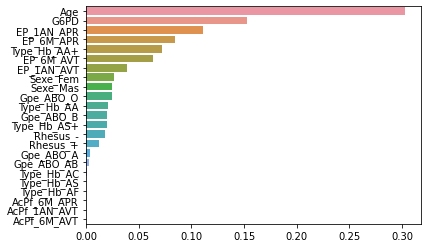

In [ ]:
sns.barplot(x=vars_imp, y=vars_imp.index)
plt.show()

In [ ]:
## suppression de variable
X_train = X_train[["Age","G6PD"]]
X_test = X_test[["Age","G6PD"]]


In [ ]:
# SVM 

from sklearn.svm import SVC

sv = SVC(random_state = 100)

sv_hyp = {'C':[0.1, 1, 10], 'kernel':['linear', 'rbf']}

svm_cv = GridSearchCV(sv, sv_hyp, cv = 5)

svm_cv.fit(X_train, Y_train)

print(svm_cv.best_score_)

print(svm_cv.best_estimator_)

0.7879425734024179
SVC(C=0.1, kernel='linear', random_state=100)


In [ ]:
# Régression logistique

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=100, max_iter=500)

lr_hyp = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

lr_cv = GridSearchCV(lr, lr_hyp, cv = 5)

lr_cv.fit(X_train, Y_train)

print(lr_cv.best_score_)
print(lr_cv.best_estimator_)



0.7879317789291882
LogisticRegression(C=0.001, max_iter=500, random_state=100)
erreur en test : 15.35 %


In [ ]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(random_state=111)

bc_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200]}

bc_cv = GridSearchCV(bc, bc_hyp, cv = 5)

bc_cv.fit(X_train, Y_train)

print(bc_cv.best_score_)

print(bc_cv.best_estimator_)

0.7743955094991365
BaggingClassifier(n_estimators=200, random_state=111)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=100).fit(X_train, Y_train)

# erreur en test 
err_val = 1 - accuracy_score(Y_test, clf.predict(X_test))
print("erreur en test : {} %".format(round(100*err_val,2)))

erreur en test : 23.65 %


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver='svd', store_covariance = True).fit(X_train, Y_train)

# erreur en test 
err_val = 1 - accuracy_score(Y_test, clf.predict(X_test))
print("erreur en test : {} %".format(round(100*err_val,2)))

erreur en test : 15.77 %


In [ ]:
# Forêt aléatoire

RF = RandomForestClassifier(random_state=100)

RF_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200],
          'max_depth':[None, 2, 5, 10, 15, 20]}

RF_cv = GridSearchCV(RF, RF_hyp, cv = 5)

RF_cv.fit(X_train, Y_train)

print(RF_cv.best_score_)

print(RF_cv.best_estimator_)

# erreur en test 
err_val = 1 - accuracy_score(Y_test, RF_cv.predict(X_test))
print("erreur en test : {} %".format(round(100*err_val,2)))

0.806611614853195
RandomForestClassifier(max_depth=5, random_state=100)
erreur en test : 15.77 %


In [ ]:
print(clf.predict([X_test.iloc[3]]))

[1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Evaluation des performances et choix du modèle

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  score = accuracy_score(Y_test, pred)
  print('Score global du modèle :', round(score, 3))

In [ ]:
models = [lr_cv.best_estimator_, RF_cv.best_estimator_, 
          svm_cv.best_estimator_, bc_cv.best_estimator_]

for model in models:
  print('Modèle ' + str(model))
  model_evaluation(model, X_test, Y_test)
  print('-'*90)

Modèle LogisticRegression(C=0.001, max_iter=500, random_state=100)
Score global du modèle : 0.846
------------------------------------------------------------------------------------------
Modèle RandomForestClassifier(max_depth=5, random_state=100)
Score global du modèle : 0.842
------------------------------------------------------------------------------------------
Modèle SVC(C=0.1, kernel='linear', random_state=100)
Score global du modèle : 0.842
------------------------------------------------------------------------------------------
Modèle BaggingClassifier(n_estimators=200, random_state=111)
Score global du modèle : 0.772
------------------------------------------------------------------------------------------


In [ ]:
# Performance du meilleur modèle sur les données de test

accuracy_score(Y_test, lr_cv.best_estimator_.predict(X_test))

0.8464730290456431